In [5]:
!pip install tensorflow_datasets

170498071/170498071 [==============================] - 30s 0us/step
automobile


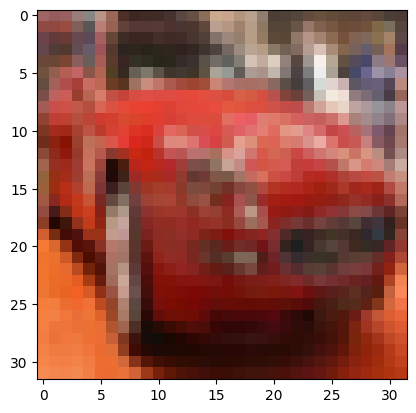

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

INFO:tensorflow:Assets written to: cifar10.model\assets


INFO:tensorflow:Assets written to: cifar10.model\assets


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential, load_model
import cv2


from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(labels[y_train[5][0]])
#print(y_train[5])
image = x_train[5]
plt.imshow(image)
plt.show()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
model.save('cifar10.model')

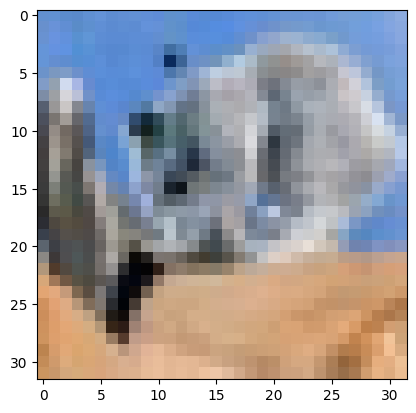

cat
1/1 [==============================] - 0s 227ms/step
[[1.6951300e-03 3.1162146e-04 1.1647226e-03 7.6996207e-01 2.3899262e-03
  1.5497649e-01 2.3160277e-02 2.6085513e-04 4.6057448e-02 2.1474500e-05]]
313/313 [==============================] - 5s 14ms/step - loss: 1.1504 - accuracy: 0.6229


[1.1504404544830322, 0.6229000091552734]

In [8]:
from tensorflow.keras.models import load_model
model2 = load_model('cifar10.model')
plt.imshow(x_test[0]*255)
plt.show()
print(labels[y_test[0][0]])
print(model2.predict(x_test[0:1]))
model2.evaluate(x_test, y_test)